# coronaデータ分布

In [1]:
from fasta2df import fasta_to_df, all_data_df_to_arange_df, blsom_outfile_to_df
from collections import defaultdict
import itertools
from sklearn.decomposition import PCA
import numpy as np
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
from keras import models
from keras import layers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

N = 5
BASE = ["A", "T", "G", "C"]
N_BASE = ["".join(i) for i in list(itertools.product(BASE, repeat=N))]

JAPAN_HEADER_COLUMNS = ["head", "ID", "date"]
ALL_DATA_HEADER_COLUMNS = ["head", "id", "continent", "country", "city", "host", "clade_head", "date"]
JAPAN_BLSOM_OUTFILE_HEADER_COLUMNS = ["head", "ID", "date", "x", "y", "distance"]
DATA_COLUMNS = ["year", "month", "day"]
CLADE_COLUMNS = ["clade", "head2"]


In [4]:
e, X, Y = blsom_outfile_to_df("Japan_ALL210219.fasta.pentaodd.out", JAPAN_BLSOM_OUTFILE_HEADER_COLUMNS)
print(X, Y)
e

250 222


,head,ID,date,x,y,distance,year,month,day
0,>hCoV-19/Japan/TKYE6938/2020,EPI_ISL_468724,2020-02,5,22,0.0774,2020,02,None
1,>hCoV-19/Japan/TKYE63442/2020,EPI_ISL_468725,2020-03,6,190,0.0553,2020,03,None
2,>hCoV-19/Japan/PG-0790/2020,EPI_ISL_684400,2020-04,112,171,0.3007,2020,04,None
3,>hCoV-19/Japan/PG-0791/2020,EPI_ISL_684401,2020-04,96,165,0.0799,2020,04,None
4,>hCoV-19/Japan/PG-0792/2020,EPI_ISL_684402,2020-04,102,168,0.1943,2020,04,None
...,...,...,...,...,...,...,...,...,...
17037,>hCoV-19/Japan/PG-9551/2020,EPI_ISL_902264,2020-07,64,178,0.3072,2020,07,None
17038,>hCoV-19/Japan/PG-9552/2020,EPI_ISL_902265,2020-07,204,69,0.4035,2020,07,None
17039,>hCoV-19/Japan/PG-9553/2020,EPI_ISL_902266,2020-07,64,178,0.3372,2020,07,None
17040,>hCoV-19/Japan/PG-9554/2020,EPI_ISL_902267,2020-07,64,178,0.1661,2020,07,None


In [6]:
e["year"].value_counts()

2020    16870
2021      172
Name: year, dtype: int64

In [12]:
e1 = e[e["year"]=="2020"]#["month"].value_counts()

In [16]:
continent_count = {"Europe": 0, "North_America":0, "Oceania":0, "Asia":0, "Africa":0, "South_America":0}
clade_count = {"G": 0, "GH":0, "GR":0, "GV":0, "L":0, "O":0, "S":0, "V":0}

continent_color = {"Europe": "torch red", "North_America": "lime", "Oceania":"blue", "Asia":"sorbus", "Africa":"fuchsia", "South_America":"yellow"}
# clade_color = {"G": "torch red", "GH":"lime", "GR":"blue", "GV":"sorbus", "L":"fuchsia", "O":"yellow", "S":"brass", "V":"green"}
# clade_color = {"G": "kelly green", "GH":"aqua", "GR":"portage", "GV":"dark orange", "L":"orange red", "O":"sea green", "S":"bakers chocolate", "V":"barberry"} # 卒研スライドの色
# clade_color = {"G": "dark green", "GH":"aqua", "GR":"indigo", "GV":"dark orange", "L":"orange red", "O":"sea green", "S":"bakers chocolate", "V":"kelly green"}
clade_color = {"G": "fuchsia", "GH":"aqua", "GR":"blueviolet", "GV":"dark orange", "L":"pink", "O":"blue", "S":"brown", "V":"dark green"}

continent = ["Europe", "North_America", "Oceania", "Asia", "Africa", "South_America"]
continent = {"Europe": "Europe", "North_America": "North America", "Oceania":"Oceania", "Asia":"Asia", "Africa":"Africa", "South_America":"South America"}
z_size = {"Europe":180, "North_America":170, "Oceania":150, "Asia":70, "Africa":40, "South_America":30}

month = {"01": 0, "GH":0, "GR":0, "GV":0, "L":0, "O":0, "S":0, "V":0}
month = ["12", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11"]
month_color = ["torch red", "lime", "blue", "sorbus", "fuchsia"]

clade = ["G", "GH", "GR", "GV", "L", "O", "S", "V"]

rgb_color = {
    "torch red": [255, 18, 52],
    "lime": [0, 255, 0],
    "blue": [0, 0, 255],
    "sorbus": [237, 107, 53],
    "fuchsia": [255, 0, 255],
    "yellow": [255, 255, 0],
    "brass": [181, 166,66],
    "green": [0, 102, 0],
    "kelly green":[51, 204, 0],
    "aqua":[0, 255, 255],
    "portage":[153, 153, 255],
    "dark orange":[255, 127, 0],
    "orange red":[255, 69, 0],
    "sea green":[46, 139, 87],
    "bakers chocolate":[92, 51, 23],
    "barberry":[217, 217, 25],
    "dark green":[0, 100, 0],
    "indigo":[75, 0, 130],
    "deeppink":[255, 20, 147],
    "gray": [128, 128, 128],
    "purple": [128, 0, 128],
    "teal": [0, 128, 128],
    "sandy brown":[244, 164, 96],
    "brown":[143, 101, 82],
    "darkviolet":[148, 0, 211],
    "blueviolet":[138, 43, 226],
    "pink":[255, 192, 203],
    
    "white": [255, 255, 255],
    "black": [0, 0, 0]}

In [38]:
def df_to_img(e, key_column, key_value):

    cor_count = defaultdict(int)

    data = e[e[key_column] == str(key_value)]
    for i in data.index:
        key = f"{data['x'][i]} {data['y'][i]}"
        cor_count[key] += 1

    # 画像データとして保存
    map_array = []
    target_c = []
    for cor in cor_count:
        count = 0
        x, y = map(int, cor.split(" "))
        map_array.append([x, y])
        target_c.append(rgb_color["aqua"])

    img = np.full((Y + 1, X + 1, 3), rgb_color['white'])

    for i, val in enumerate(map_array):
        img[val[1]][val[0]] = target_c[i]
    return img

# 2D地域別+全Clade

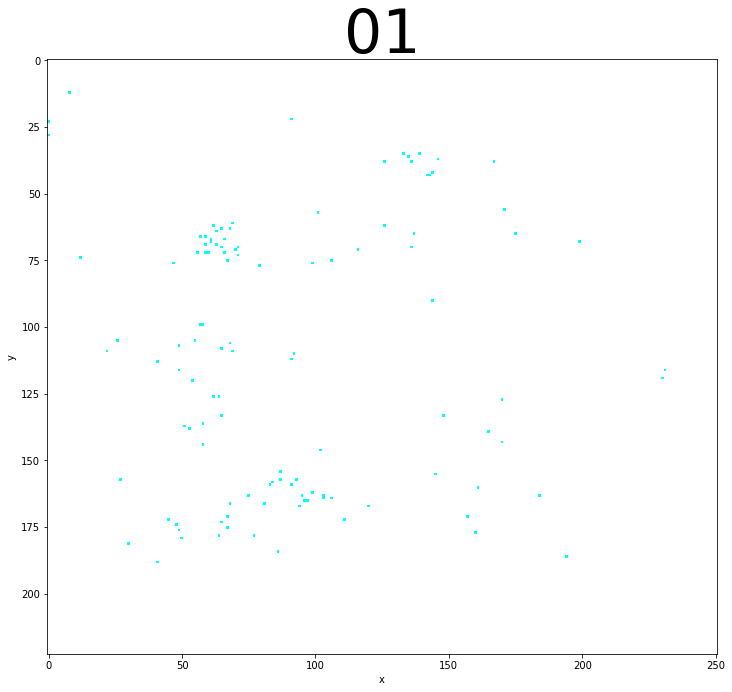

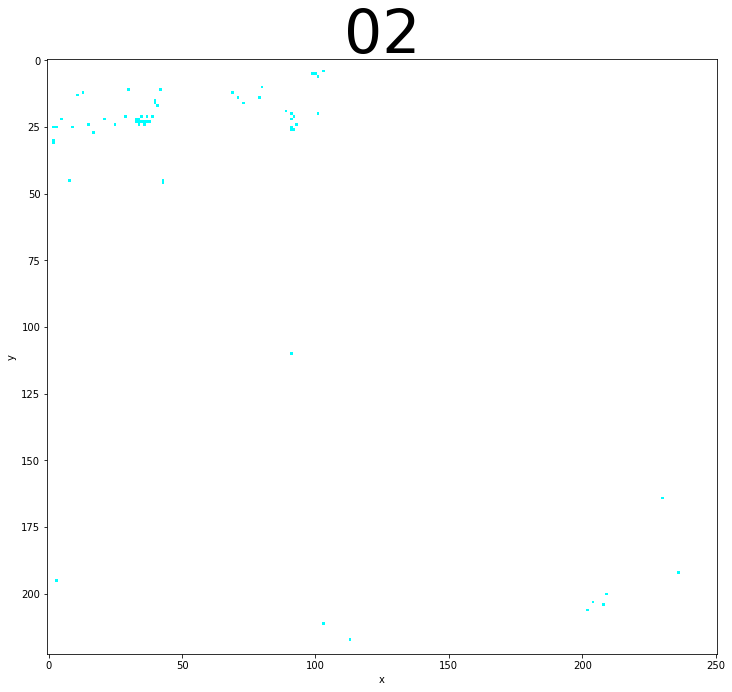

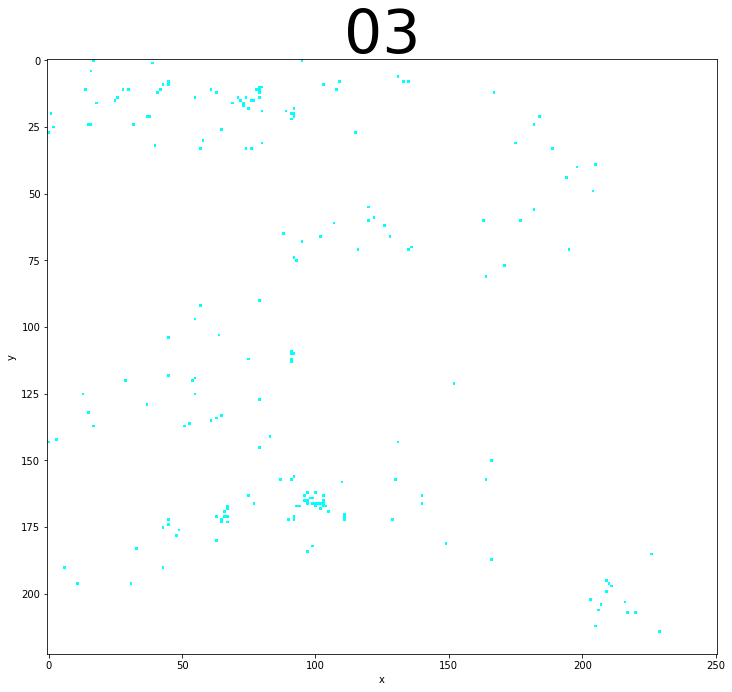

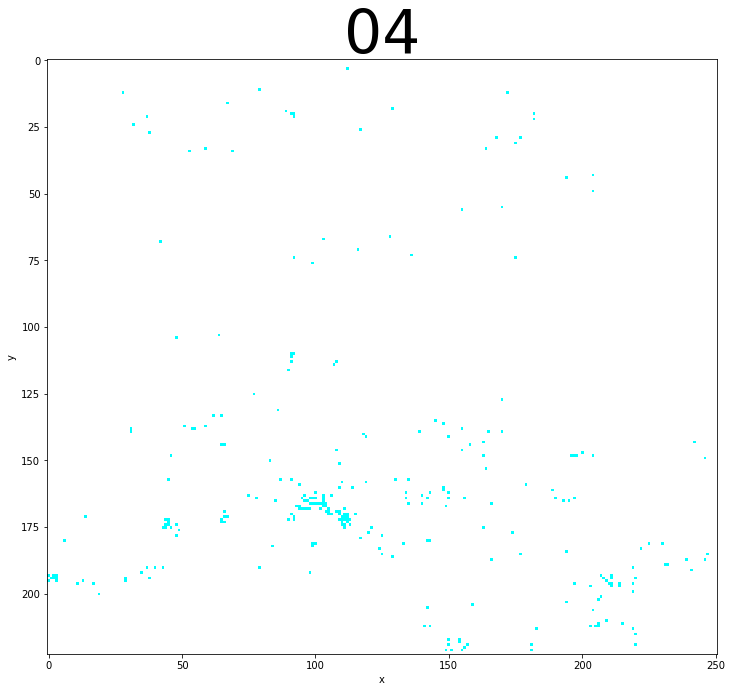

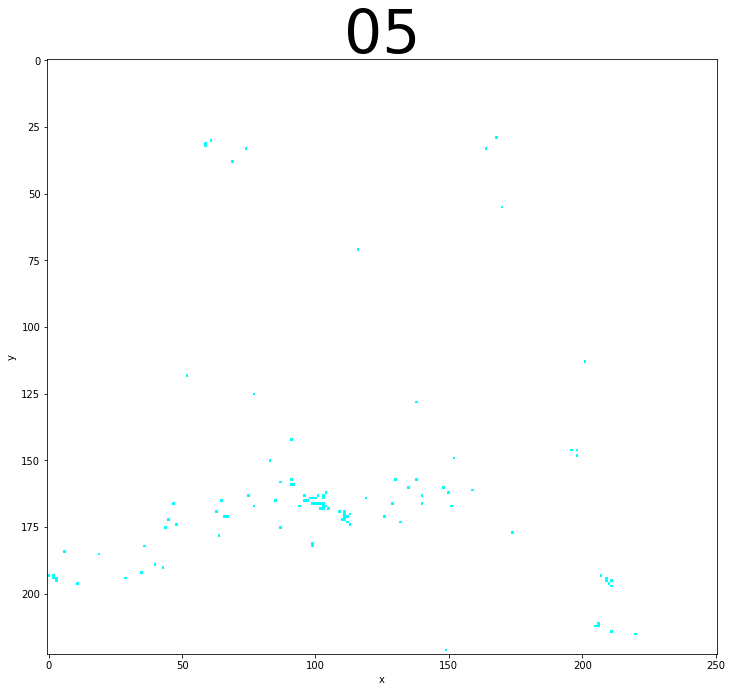

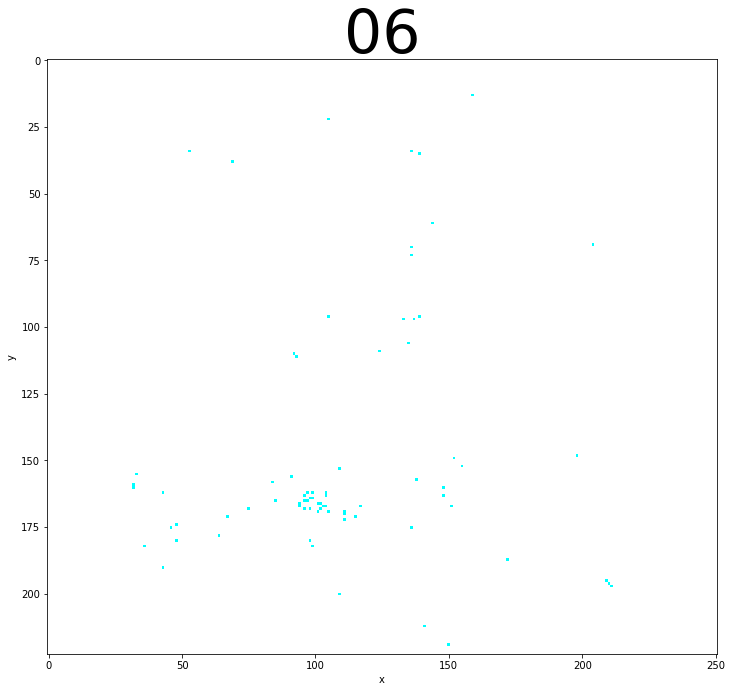

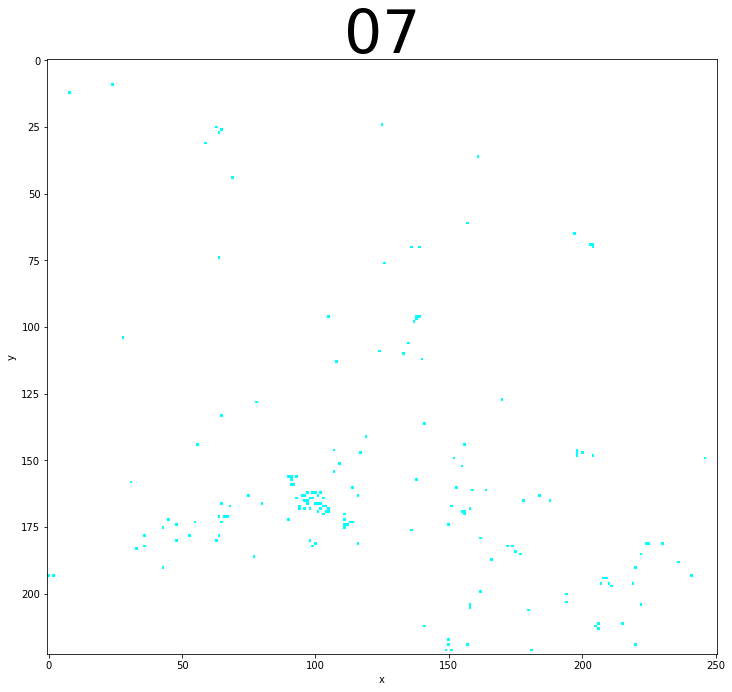

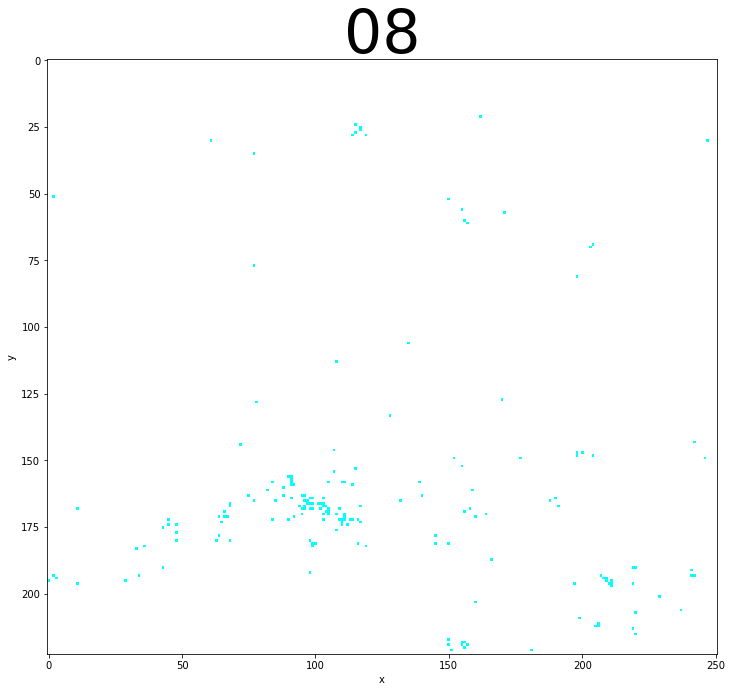

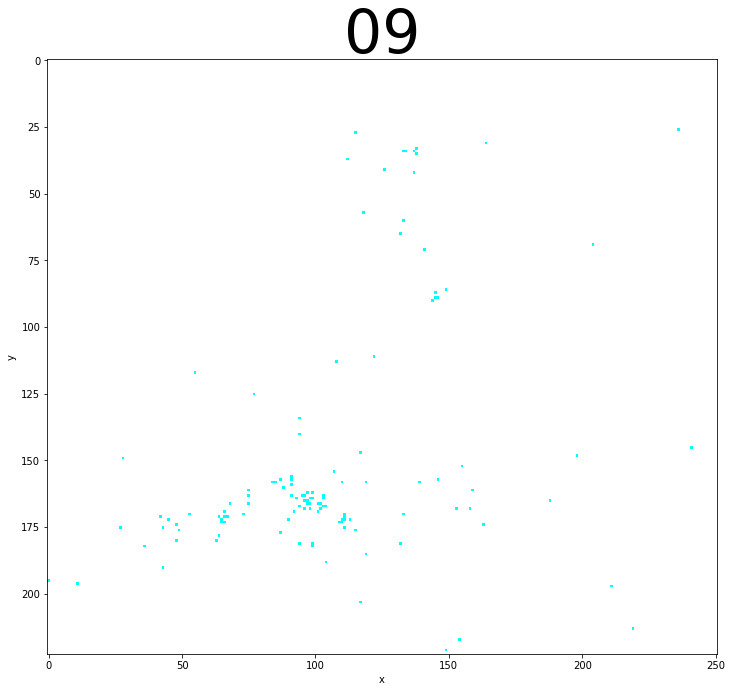

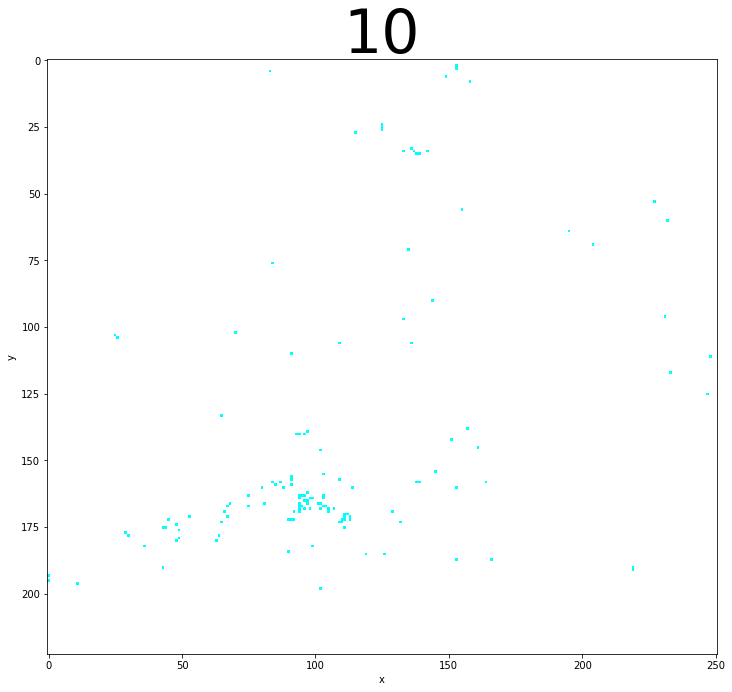

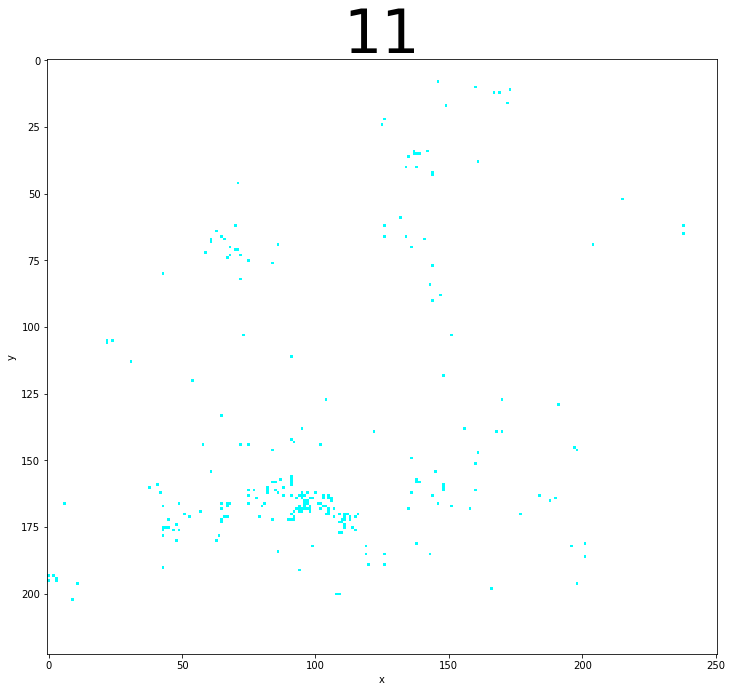

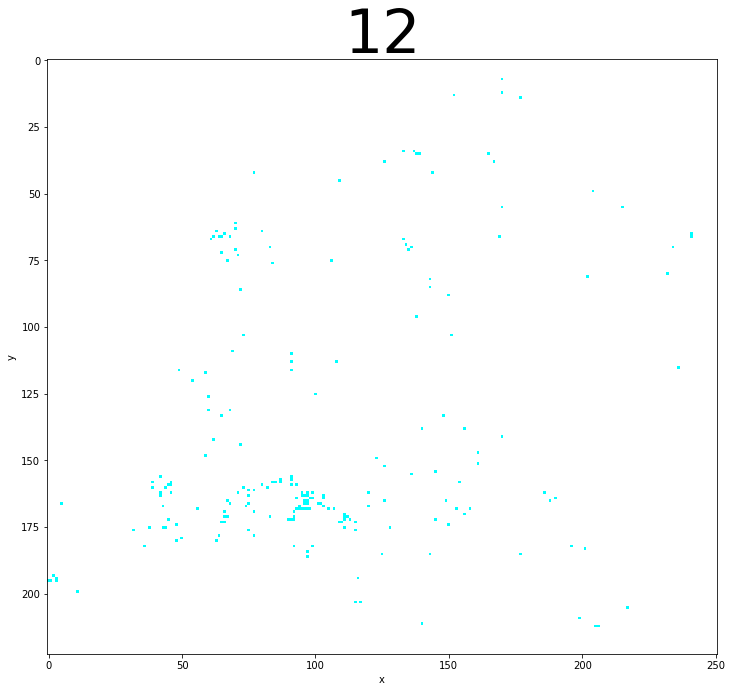

In [45]:
from tqdm import tqdm
# key_column = "year"
# start = 2020
# end = 2021
key_column = "month"
start = 1
end = 12

for tar in range(start, end+1):

    if key_column == "month" and len(str(tar)) == 1:
        tar = f"0{str(tar)}"

    data = e[(e[key_column]==str(tar))]
    
    img = df_to_img(data, key_column, tar)

    plt.figure(figsize=(12, 12))
    plt.xlabel('x')
    plt.ylabel('y')
    # グラフの指定
    plt.title(tar, fontsize=60)
    plt.imshow(img)
#         plt.savefig(f'BlsomByClade/2D/{ppp[cl]}ByMonth/{month}Month.png')
#         plt.savefig(f'件数10以下削除/BlsomByContinent/2D/{ppp[cl]}ByMonth/{month}Month.png')
#     plt.savefig(f'ByContinent全体単色/2D色分け/{con}.png')
#     plt.savefig(f'temp/{con}2D.png')

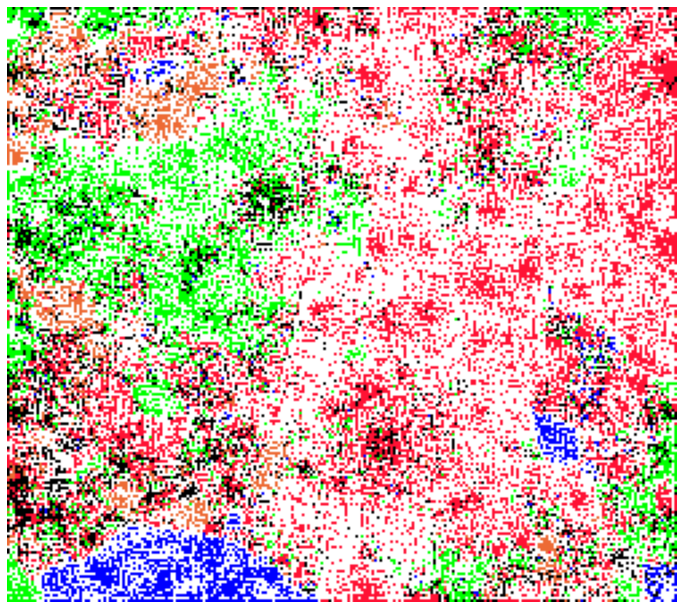

In [36]:
# img1 = np.array(img, dtype='uint8')
# img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(12, 12))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params('x', length=0, which='major')
ax.tick_params('y', length=0, which='major')

ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
plt.imshow(img)
plt.savefig(f'oddpenta_x250_1%_without_Africa_SouthAmerica.png')

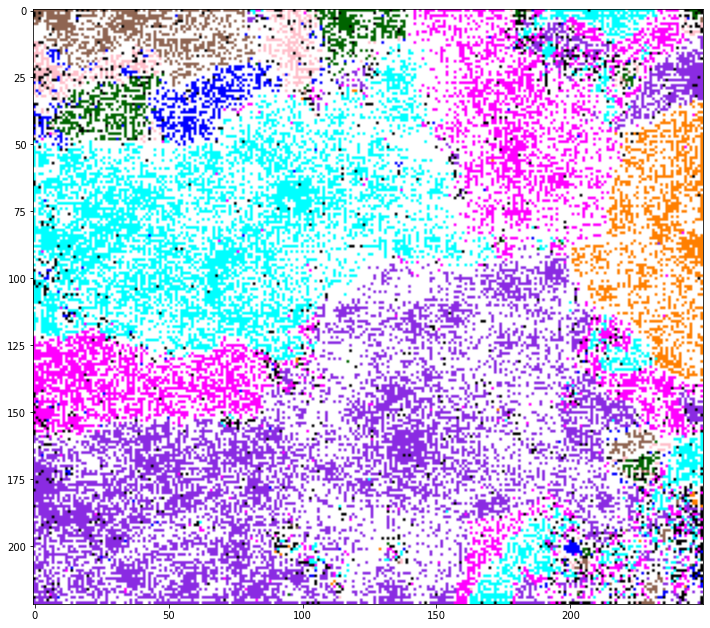

In [16]:
# img1 = np.array(img, dtype='uint8')
# img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img)
# plt.savefig(f'out_clade_oddpenta_x250_under1_blsomMag.png')

# 2D地域別単色

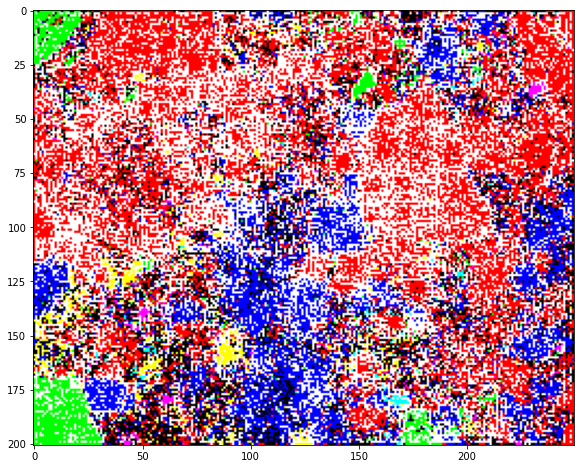

In [108]:
plt.figure(figsize=(12, 8))
plt.imshow(img)